Spam Detector is used to detect unwanted, malicious and virus infected texts and helps to separate them from the nonspam texts. It uses a binary type of classification containing the labels such as ‘ham’ (nonspam) and spam. Application of this can be seen in Google Mail (GMAIL) where it segregates the spam emails in order to prevent them from getting into the user’s inbox.

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.
This corpus has been collected from free or free for research sources at the Internet:
-> A collection of 5573 rows SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. 
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. 


In [1]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip3 install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.3 MB/s 
     |████████████████████████████████| 133 kB 30.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=2200182883a73c9b393f48584b20d52a462396c983242b5de42a9c94d0dfbcfa
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [5]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 622 kB 5.2 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622381 sha256=20427276b44b6fd984d7f7a240c524a3fae0f7da55295b99950b4571b6cd2d89
  Stored in directory: /root/.cache/pip/wheels/72/b8/3b/a90246d13090e85394a8a44b78c8abf577c0766f29d6543c75
Successfully built autocorrect


In [6]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.6) ...


In [8]:
#import all the needed libraries
import mailbox
%matplotlib inline
import matplotlib.pyplot as plt
import csv
from textblob import TextBlob
import pandas
import sklearn
#import cPickle
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 
#import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import learning_curve, GridSearchCV
#from sklearn.learning_curve import learning_curve

#import metrics libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [9]:
import pandas as pd
import numpy as np

In [10]:
#reading train and test data
df = pd.read_csv('/content/spam.csv', 
                 engine="python",
                 error_bad_lines=False,  
                 encoding="ISO-8859-1")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
df.head(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN


In [12]:
#pip install autocorrect from autocorrect import Speller

In [13]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
from autocorrect import Speller

In [14]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [15]:
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [16]:
df.rename(columns={'v1':'labels','v2':'messages'},inplace=True)

In [17]:
df.head(2)

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


# lets visualize the spam words

In [18]:
from wordcloud import WordCloud 

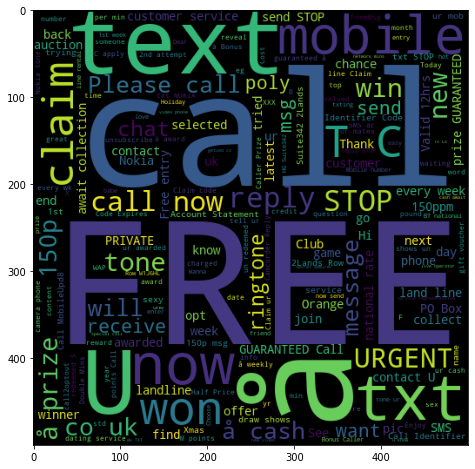

In [19]:
spam_words= ' '.join(list(df[df['labels']=='spam']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# lets visualize the ham words

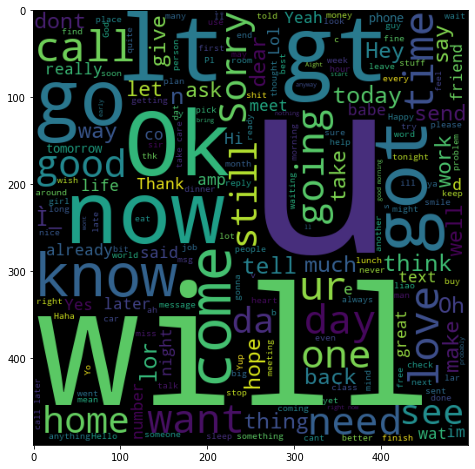

In [20]:
spam_words= ' '.join(list(df[df['labels']=='ham']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# Preprocessing the data

In [21]:
text = ['hello i am ankita']

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
df.shape

(5572, 2)

In [25]:
import re
spell=Speller()
from tqdm import tqdm
stemmer=PorterStemmer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
#encoding our labels
df['labels']=df['labels'].apply(lambda x: 1 if x=='spam' else 0)

In [27]:
new_df=[]

for i in range(df.shape[0]):
    lines=df.iloc[i,1]
    # removing non alphabatic characters
    lines = re.sub('[^A-Za-z]',' ',lines)
    #lowering the every word
    lines = lines.lower()
    #tokenization
    tokenized_lines=word_tokenize(lines)
    #removing stop words , steming and spell correction
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer().stem(i)))
    final_lines=' '.join(processed_lines)
    new_df.append(final_lines)       

In [28]:
new_df

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

In [29]:
tokenized_lines

['rofl', 'its', 'true', 'to', 'its', 'name']

In [30]:
processed_lines

['roll', 'true', 'name']

In [31]:
len(new_df)

5572

In [32]:
Y=df['labels']
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

# Splitting the data into Train and test

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(new_df,Y,test_size=0.25)

In [34]:
X_train

['bold lt gt',
 'ok pro come lunch',
 'hey glad u r better hear u treat self digi cam good r pm fab new year c u couple wk',
 'jay say put lt gt',
 'sorry da thought call lot time lil bus call noon',
 'mark work tomorrow get work house meet u afterward',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'u made appoint',
 'than putting da font',
 'bu love',
 'hey angry reply dr',
 'lt denim gt common car better buy china asia find less expense holly',
 'ok finish soon',
 'fine way u feel way got b',
 'hey anyway',
 'dude like buff wind',
 'contract year special cinema pass call c superman v matrix starwars etc free bx ip pm dont miss',
 'pleas call custom service metres freephon pm guarantee cash prize',
 'mani people seem special first sight remain special till last sight maintain till life end take cr da',
 'guy ask get slipper gone last year',
 'not using u n xy lor sorry lor da guy nova c u person sort know u lor u wan meet xy ask bring u along next meet',
 '

In [35]:
len(X_train)

4179

In [36]:
len(X_test)

1393

# Vectrazation

In [37]:
from sklearn.feature_extraction.text import CountVectorizer #tf_idf
matrix=CountVectorizer()


In [38]:
X_train_vect=matrix.fit_transform(X_train).toarray()
X_test_vect=matrix.transform(X_test).toarray()

In [39]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
X_test_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
Y_train

1724    0
1606    0
2629    0
2528    0
2653    0
       ..
277     0
536     0
3352    0
4139    0
3909    0
Name: labels, Length: 4179, dtype: int64

In [42]:
Y_test

2531    0
1779    1
2184    0
2822    0
1202    0
       ..
2862    0
2161    0
1977    1
1513    0
2652    0
Name: labels, Length: 1393, dtype: int64

# Train our model, naive bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [44]:
model.fit(X_train_vect,Y_train)

GaussianNB()

In [45]:
model.classes_

array([0, 1])

In [46]:
Y_pred=model.predict(X_test_vect)

In [47]:
Y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [48]:
Y_test

2531    0
1779    1
2184    0
2822    0
1202    0
       ..
2862    0
2161    0
1977    1
1513    0
2652    0
Name: labels, Length: 1393, dtype: int64

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
accuracy_score(Y_test,Y_pred) * 100

85.1399856424982

In [51]:
confusion_matrix(Y_test,Y_pred)

array([[1018,  185],
       [  22,  168]])